In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [4]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-06-20--17h-16m-34s',
 '2025-06-20--17h-21m-29s',
 '2025-06-20--17h-26m-32s',
 '2025-06-20--17h-31m-35s',
 '2025-06-20--17h-36m-38s',
 '2025-06-20--17h-41m-43s',
 '2025-06-20--17h-46m-48s',
 '2025-06-20--17h-51m-53s',
 '2025-06-20--17h-56m-58s',
 '2025-06-20--18h-02m-03s',
 '2025-06-20--18h-07m-08s',
 '2025-06-20--18h-12m-13s',
 '2025-06-20--18h-17m-18s',
 '2025-06-20--18h-22m-24s',
 '2025-06-20--18h-27m-28s',
 '2025-06-20--18h-32m-32s',
 '2025-06-20--18h-37m-37s',
 '2025-06-20--18h-42m-41s',
 '2025-06-20--18h-47m-44s',
 '2025-06-20--18h-52m-47s',
 '2025-06-20--18h-57m-50s',
 '2025-06-20--19h-02m-55s',
 '2025-06-20--19h-08m-00s',
 '2025-06-20--19h-13m-05s',
 '2025-06-20--19h-18m-11s',
 '2025-06-20--19h-23m-16s',
 '2025-06-20--19h-28m-37s',
 '2025-06-20--19h-33m-42s',
 '2025-06-20--19h-38m-47s',
 '2025-06-20--19h-43m-53s',
 '2025-06-20--19h-48m-57s',
 '2025-06-20--19h-54m-03s',
 '2025-06-20--19h-59m-08s',
 '2025-06-20--20h-04m-13s',
 '2025-06-20--20h-09m-20s',
 '2025-06-20--20h-14

In [5]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "corrected_estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    # if repetitions is not in params, set it to 1
    if "repetitions" not in params.columns:
        params["repetitions"] = pd.Series([1])
    else:
        params["repetitions"] = params["repetitions"].astype(int)

    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "corrected_estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
0,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
1,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
2,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
3,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
4,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2493336,2025-06-21--03h-47m-55s,92.0,56.0,3.0,49.0,200.0,1.535789,1.413801,1.413801,1.570796,1.570796
2493337,2025-06-21--03h-47m-55s,88.0,61.0,3.0,48.0,200.0,1.505750,1.409301,1.409301,1.570796,1.570796
2493338,2025-06-21--03h-47m-55s,86.0,63.0,0.0,51.0,200.0,1.510760,NaN,1.570796,1.570796,1.570796
2493339,2025-06-21--03h-47m-55s,86.0,62.0,2.0,50.0,200.0,1.510760,1.446139,1.446139,1.570796,1.570796


In [6]:
estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]

/tmp/ipykernel_1241977/3925035558.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]


,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
20907,2025-06-20--17h-16m-34s,167.0,365639.0,473.0,1.0,366280.0,0.059216,0.531984,0.531984,0.0,0.000000
533206,2025-06-20--19h-23m-16s,127.0,361478.0,513.0,2.0,362120.0,0.059648,0.455909,0.455909,0.0,0.785398
1033147,2025-06-20--21h-30m-46s,102.0,301457.0,436.0,5.0,302000.0,0.060251,0.444446,0.444446,0.0,1.570796


# Load Theory Curves

In [7]:
theta_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'theta_estimator_stats.csv'))
theta_theory

,theta,n,theta_estimator_mean,theta_estimator_variance
0,0.000000,40,0.000000,0.000000
1,0.006283,40,0.000177,0.000040
2,0.012566,40,0.000707,0.000158
3,0.018850,40,0.001589,0.000354
4,0.025133,40,0.002820,0.000626
...,...,...,...,...
2500,3.116460,200,3.135388,0.000594
2501,3.122743,200,3.138075,0.000343
2502,3.129026,200,3.140020,0.000156
2503,3.135309,200,3.141198,0.000039


In [8]:
delta_phi_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats.csv'))
delta_phi_theory

,delta_phi,theta,n,delta_phi_estimator_mean,delta_phi_estimator_variance
0,0.000000,0.785398,40,0.000000,0.000000
1,0.003142,0.785398,40,0.000031,0.000010
2,0.006283,0.785398,40,0.000126,0.000041
3,0.009425,0.785398,40,0.000283,0.000092
4,0.012566,0.785398,40,0.000503,0.000164
...,...,...,...,...,...
7510,1.558230,1.570796,200,1.569223,0.000156
7511,1.561372,1.570796,200,1.569909,0.000088
7512,1.564513,1.570796,200,1.570402,0.000039
7513,1.567655,1.570796,200,1.570698,0.000010


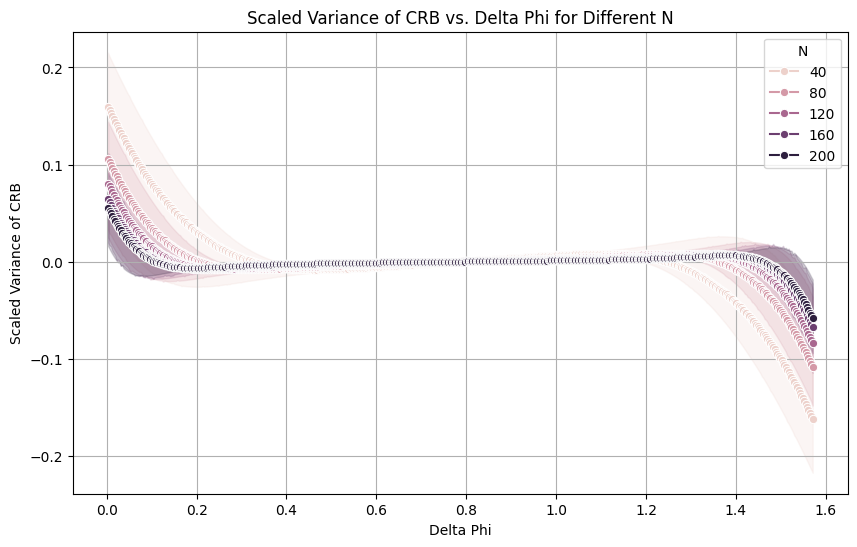

In [9]:
overlap_adjusted_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'phase_estimation_multiN.csv'))
overlap_adjusted_theory = overlap_adjusted_theory

# Plot VarCRB_scaled against delta_phi for each N from overlap_adjusted_theory
def plot_varcrb_scaled_vs_delta_phi(df):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="delta_phi", y="bias", hue="N", marker="o")
    plt.title("Scaled Variance of CRB vs. Delta Phi for Different N")
    plt.xlabel("Delta Phi")
    plt.ylabel("Scaled Variance of CRB")
    plt.legend(title="N", loc='upper right')
    plt.grid(True)
    plt.show()
plot_varcrb_scaled_vs_delta_phi(overlap_adjusted_theory)

# Theta

In [10]:
# round N to the nearest 40
estimates_df["nearest_40_N"] = estimates_df["N"].apply(lambda x: 0 if x > 200 else round(x / 40) * 40)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi,nearest_40_N
0,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
1,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
2,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
3,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
4,2025-06-20--17h-16m-34s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
2493336,2025-06-21--03h-47m-55s,92.0,56.0,3.0,49.0,200.0,1.535789,1.413801,1.413801,1.570796,1.570796,200
2493337,2025-06-21--03h-47m-55s,88.0,61.0,3.0,48.0,200.0,1.505750,1.409301,1.409301,1.570796,1.570796,200
2493338,2025-06-21--03h-47m-55s,86.0,63.0,0.0,51.0,200.0,1.510760,NaN,1.570796,1.570796,1.570796,200
2493339,2025-06-21--03h-47m-55s,86.0,62.0,2.0,50.0,200.0,1.510760,1.446139,1.446139,1.570796,1.570796,200


In [11]:
theta_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",
    "delta_phi_estimate": ["mean", "std", "var"]
}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates.columns = ['_'.join(col).strip() for col in theta_estimates.columns.values]
theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.000000,0.015239,0.057357,0.003290,9157,0.785398,0.000000,0.000000
1,40.0,0.000000,0.785398,0.015503,0.057735,0.003333,9053,0.806975,0.061028,0.003724
2,40.0,0.000000,1.570796,0.015794,0.058283,0.003397,7550,0.785398,0.000000,0.000000
3,40.0,0.130900,0.000000,0.073176,0.113362,0.012851,9213,0.751399,0.081356,0.006619
4,40.0,0.130900,0.785398,0.057196,0.102834,0.010575,9164,0.774079,0.072720,0.005288
...,...,...,...,...,...,...,...,...,...,...
715,367400.0,1.178097,0.000000,1.159532,NaN,NaN,1,0.104277,NaN,NaN
716,368520.0,0.130900,0.000000,0.134636,NaN,NaN,1,0.241254,NaN,NaN
717,369040.0,1.047198,0.000000,1.030416,NaN,NaN,1,0.109381,NaN,NaN
718,369320.0,0.261799,0.000000,0.256439,NaN,NaN,1,0.162726,NaN,NaN


In [53]:
theta_estimates_integrated_over_phi = estimates_df.groupby(["N", "theta"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",

}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates_integrated_over_phi.columns = ['_'.join(col).strip() for col in theta_estimates_integrated_over_phi.columns.values]
theta_estimates_integrated_over_phi

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count
0,40.0,0.000000,0.015494,0.057761,0.003336,25760
1,40.0,0.130900,0.063806,0.107427,0.011541,27429
2,40.0,0.261799,0.196997,0.144486,0.020876,27504
3,40.0,0.392699,0.345890,0.132659,0.017598,27155
4,40.0,0.523599,0.483478,0.120826,0.014599,27143
...,...,...,...,...,...,...
243,367400.0,1.178097,1.159532,NaN,NaN,1
244,368520.0,0.130900,0.134636,NaN,NaN,1
245,369040.0,1.047198,1.030416,NaN,NaN,1
246,369320.0,0.261799,0.256439,NaN,NaN,1


## Mean

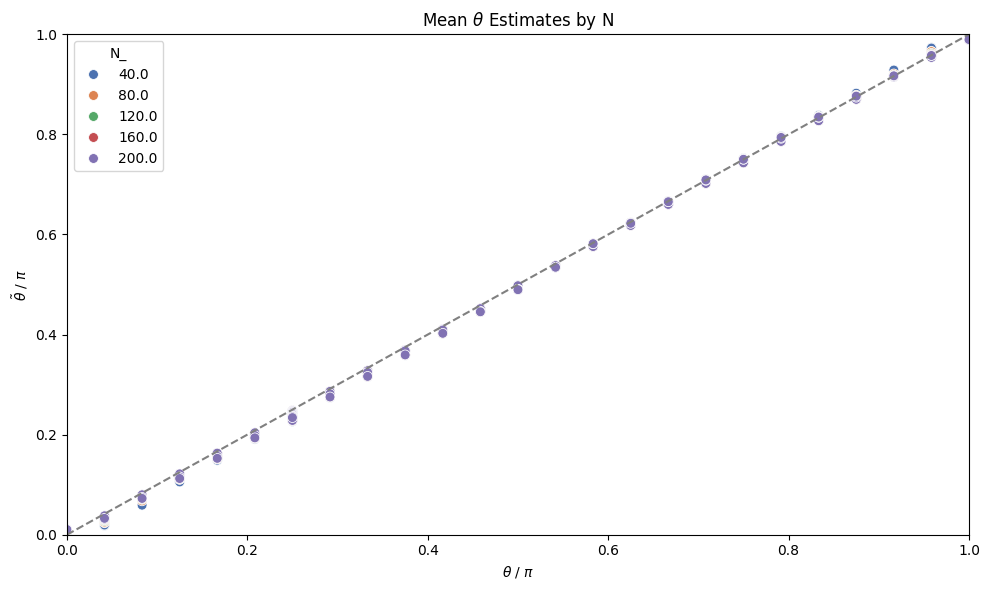

In [13]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"] < 201],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\tilde{\theta}$ / $\pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0, 1)
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

## Error

### Uncompensated

/tmp/ipykernel_1241977/554328612.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = theta_estimates[mask][theta_estimates["N_"] > 301]


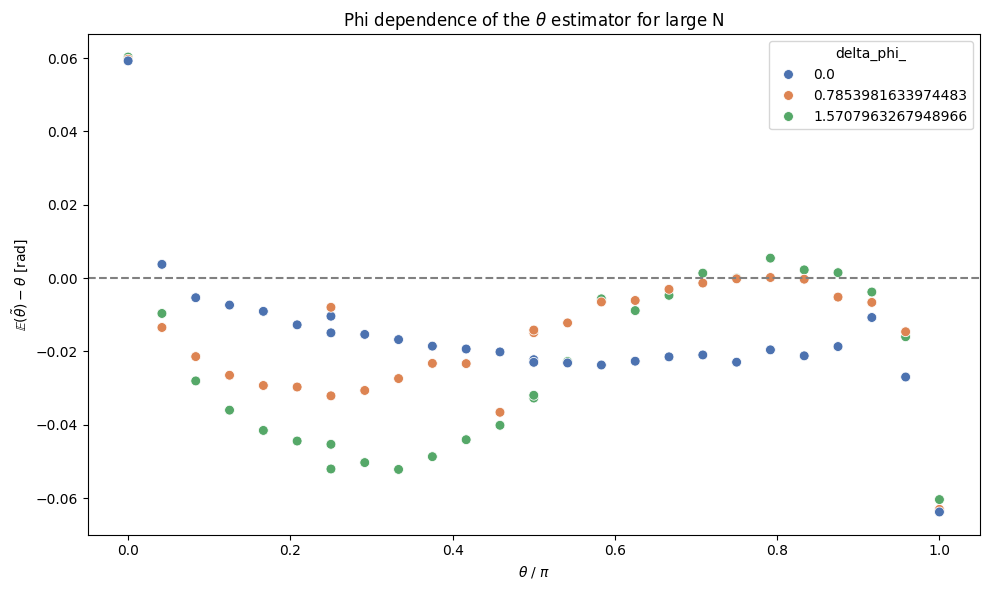

In [30]:
# Define tolerance (adjust as needed)
tol = 0.01  # radians

# Define target values for delta_phi
targets = [0, np.pi / 2, np.pi / 4]

# Create mask for filtering
mask = np.isclose(
    np.array(theta_estimates["delta_phi_"])[:, np.newaxis],
    targets,
    atol=tol
).any(axis=1)

# Apply mask to filter data
filtered = theta_estimates[mask][theta_estimates["N_"] > 301]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_"]),
    hue=filtered["delta_phi_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\mathbb{E}(\tilde{\theta}) - \theta\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Phi dependence of the $\theta$ estimator for large N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_delta_phi_at_large_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

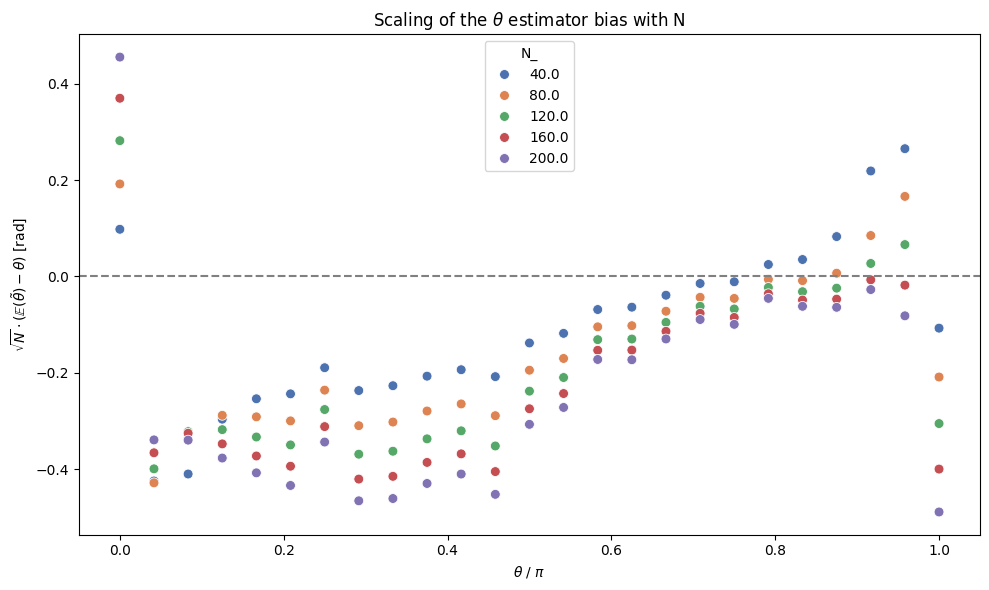

In [40]:
# Apply mask to filter data
filtered = theta_estimates_integrated_over_phi[theta_estimates_integrated_over_phi["N_"] <= 300]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_"]) * np.sqrt(filtered["N_"]),
    hue=filtered["N_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\theta}) - \theta)\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Scaling of the $\theta$ estimator bias with N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

### Compensated

##### Integrated over phi

In [54]:
biggest_n_for_each_theta = theta_estimates_integrated_over_phi.groupby("theta_")["N_"].max().reset_index()
biggest_n_for_each_theta

,theta_,N_
0,0.000000,366280.0
1,0.130900,368520.0
2,0.261799,369880.0
3,0.392699,364640.0
4,0.523599,365960.0
5,0.654498,366680.0
6,0.785398,364360.0
7,0.916298,363280.0
8,1.047198,369040.0
9,1.178097,367400.0


In [56]:
max_n_theta_estimates_integrated_over_phi = theta_estimates_integrated_over_phi.merge(
    biggest_n_for_each_theta,
    on=["theta_", "N_"],
)
max_n_theta_estimates_integrated_over_phi

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count
0,349000.0,2.879793,2.873154,NaN,NaN,1
1,349600.0,3.141593,3.077805,NaN,NaN,1
2,351240.0,2.748894,2.730213,NaN,NaN,1
3,353360.0,3.010693,2.983709,NaN,NaN,1
4,356160.0,2.617994,2.596782,NaN,NaN,1
5,356480.0,2.487094,2.467512,NaN,NaN,1
6,358280.0,1.832596,1.808886,NaN,NaN,1
7,358480.0,2.356194,2.333252,NaN,NaN,1
8,358840.0,2.225295,2.204323,NaN,NaN,1
9,359480.0,1.701696,1.678543,NaN,NaN,1


In [58]:
# merge the two dataframes
theta_estimates_integrated_over_phi_with_max_n = theta_estimates_integrated_over_phi.merge(
    max_n_theta_estimates_integrated_over_phi[["N_", "theta_", "theta_estimate_mean"]],
    on=["theta_"],
    suffixes=("", "_max_n"),
)
theta_estimates_integrated_over_phi_with_max_n

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,N__max_n,theta_estimate_mean_max_n
0,40.0,0.000000,0.015494,0.057761,0.003336,25760,366280.0,0.059216
1,40.0,0.130900,0.063806,0.107427,0.011541,27429,368520.0,0.134636
2,40.0,0.261799,0.196997,0.144486,0.020876,27504,369880.0,0.240381
3,40.0,0.392699,0.345890,0.132659,0.017598,27155,364640.0,0.366196
4,40.0,0.523599,0.483478,0.120826,0.014599,27143,365960.0,0.514519
...,...,...,...,...,...,...,...,...
243,367400.0,1.178097,1.159532,NaN,NaN,1,367400.0,1.159532
244,368520.0,0.130900,0.134636,NaN,NaN,1,368520.0,0.134636
245,369040.0,1.047198,1.030416,NaN,NaN,1,369040.0,1.030416
246,369320.0,0.261799,0.256439,NaN,NaN,1,369880.0,0.240381


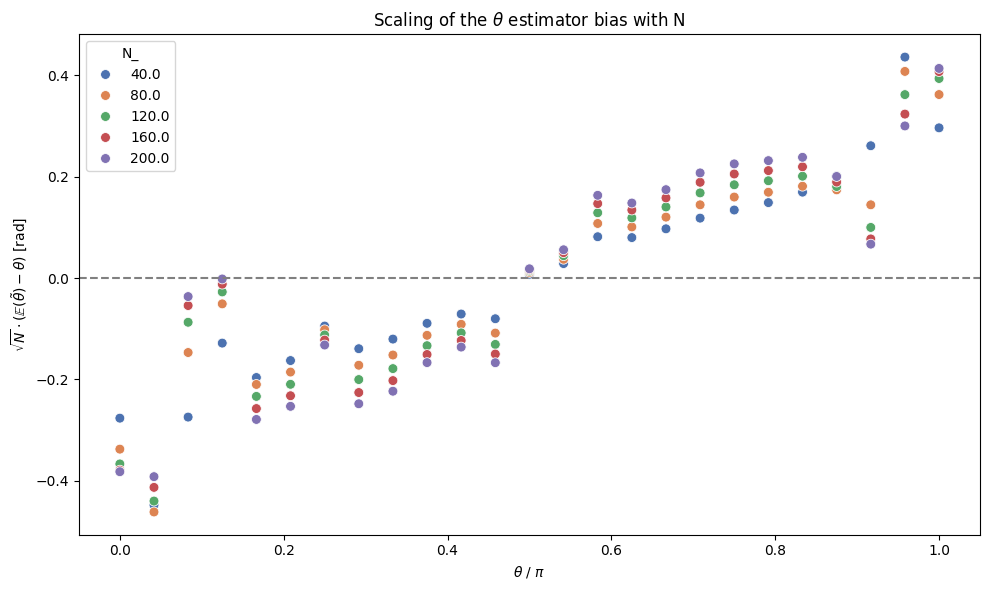

In [60]:
# Integrated over phi

# Apply mask to filter data
filtered = theta_estimates_integrated_over_phi_with_max_n[theta_estimates_integrated_over_phi_with_max_n["N_"] <= 300]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_estimate_mean_max_n"]) * np.sqrt(filtered["N_"]),
    hue=filtered["N_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\theta}) - \theta)\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Scaling of the $\theta$ estimator bias with N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

##### Not integrated over phi

In [71]:
biggest_n_for_each_theta_phi = theta_estimates.groupby(["theta_", "delta_phi_"]).agg({
    "N_": "max"
}).reset_index()
biggest_n_for_each_theta_phi

,theta_,delta_phi_,N_
0,0.000000,0.000000,366280.0
1,0.000000,0.785398,362120.0
2,0.000000,1.570796,302000.0
3,0.130900,0.000000,368520.0
4,0.130900,0.785398,366560.0
...,...,...,...
114,3.010693,0.785398,349280.0
115,3.010693,1.570796,334960.0
116,3.141593,0.000000,349600.0
117,3.141593,0.785398,348520.0


In [81]:
max_n_theta_estimates = theta_estimates.merge(
    biggest_n_for_each_theta_phi,
    on=["theta_", "delta_phi_", "N_"],
    suffixes=("", "_max_n")
)
max_n_theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,284560.0,1.832596,1.570796,1.826926,NaN,NaN,1,1.495538,NaN,NaN
1,288960.0,1.439897,0.785398,1.403292,NaN,NaN,1,0.743626,NaN,NaN
2,292800.0,2.356194,1.570796,2.356166,NaN,NaN,1,1.479328,NaN,NaN
3,300560.0,2.879793,0.000000,2.869035,NaN,NaN,1,0.125901,NaN,NaN
4,302000.0,0.000000,1.570796,0.060251,NaN,NaN,1,0.444446,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
114,367400.0,1.178097,0.000000,1.159532,NaN,NaN,1,0.104277,NaN,NaN
115,368520.0,0.130900,0.000000,0.134636,NaN,NaN,1,0.241254,NaN,NaN
116,369040.0,1.047198,0.000000,1.030416,NaN,NaN,1,0.109381,NaN,NaN
117,369320.0,0.261799,0.000000,0.256439,NaN,NaN,1,0.162726,NaN,NaN


In [84]:
theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.000000,0.015239,0.057357,0.003290,9157,0.785398,0.000000,0.000000
1,40.0,0.000000,0.785398,0.015503,0.057735,0.003333,9053,0.806975,0.061028,0.003724
2,40.0,0.000000,1.570796,0.015794,0.058283,0.003397,7550,0.785398,0.000000,0.000000
3,40.0,0.130900,0.000000,0.073176,0.113362,0.012851,9213,0.751399,0.081356,0.006619
4,40.0,0.130900,0.785398,0.057196,0.102834,0.010575,9164,0.774079,0.072720,0.005288
...,...,...,...,...,...,...,...,...,...,...
715,367400.0,1.178097,0.000000,1.159532,NaN,NaN,1,0.104277,NaN,NaN
716,368520.0,0.130900,0.000000,0.134636,NaN,NaN,1,0.241254,NaN,NaN
717,369040.0,1.047198,0.000000,1.030416,NaN,NaN,1,0.109381,NaN,NaN
718,369320.0,0.261799,0.000000,0.256439,NaN,NaN,1,0.162726,NaN,NaN


In [86]:
# merge the two dataframes
theta_estimates_with_max_n = theta_estimates.merge(
    max_n_theta_estimates[["N_", "theta_", "delta_phi_", "theta_estimate_mean"]],
    on=["theta_", "delta_phi_"],
    suffixes=("", "_max_n"),
)
theta_estimates_with_max_n

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,N__max_n,theta_estimate_mean_max_n
0,40.0,0.000000,0.000000,0.015239,0.057357,0.003290,9157,0.785398,0.000000,0.000000,366280.0,0.059216
1,40.0,0.000000,0.785398,0.015503,0.057735,0.003333,9053,0.806975,0.061028,0.003724,362120.0,0.059648
2,40.0,0.000000,1.570796,0.015794,0.058283,0.003397,7550,0.785398,0.000000,0.000000,302000.0,0.060251
3,40.0,0.130900,0.000000,0.073176,0.113362,0.012851,9213,0.751399,0.081356,0.006619,368520.0,0.134636
4,40.0,0.130900,0.785398,0.057196,0.102834,0.010575,9164,0.774079,0.072720,0.005288,366560.0,0.117419
...,...,...,...,...,...,...,...,...,...,...,...,...
715,367400.0,1.178097,0.000000,1.159532,NaN,NaN,1,0.104277,NaN,NaN,367400.0,1.159532
716,368520.0,0.130900,0.000000,0.134636,NaN,NaN,1,0.241254,NaN,NaN,368520.0,0.134636
717,369040.0,1.047198,0.000000,1.030416,NaN,NaN,1,0.109381,NaN,NaN,369040.0,1.030416
718,369320.0,0.261799,0.000000,0.256439,NaN,NaN,1,0.162726,NaN,NaN,369320.0,0.256439


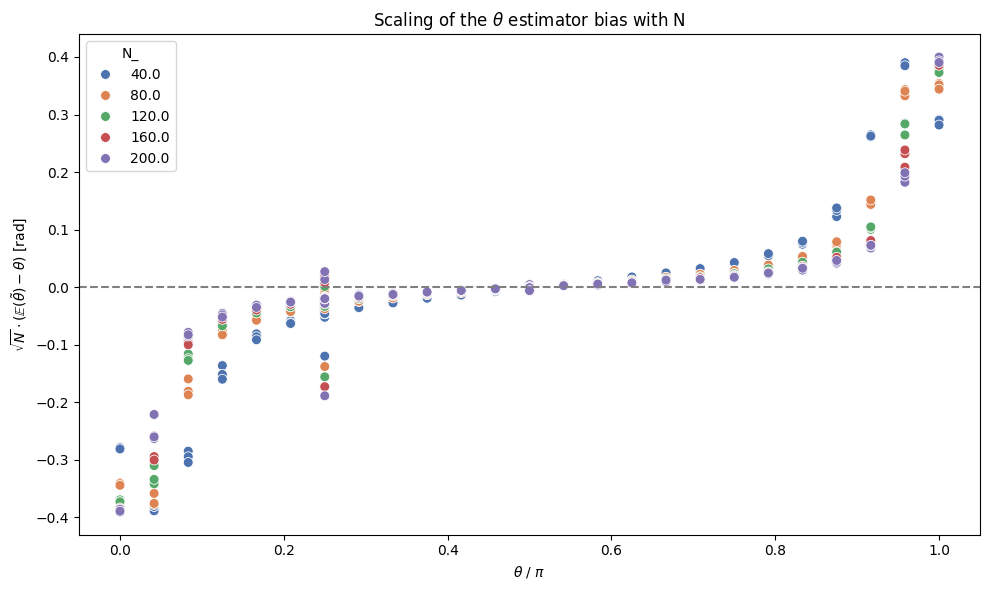

In [87]:
# Separate phi

# Apply mask to filter data
filtered = theta_estimates_with_max_n[theta_estimates_with_max_n["N_"] <= 300]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_estimate_mean_max_n"]) * np.sqrt(filtered["N_"]),
    hue=filtered["N_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\theta}) - \theta)\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Scaling of the $\theta$ estimator bias with N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

## Variance

### Without Theory

#### By Phi

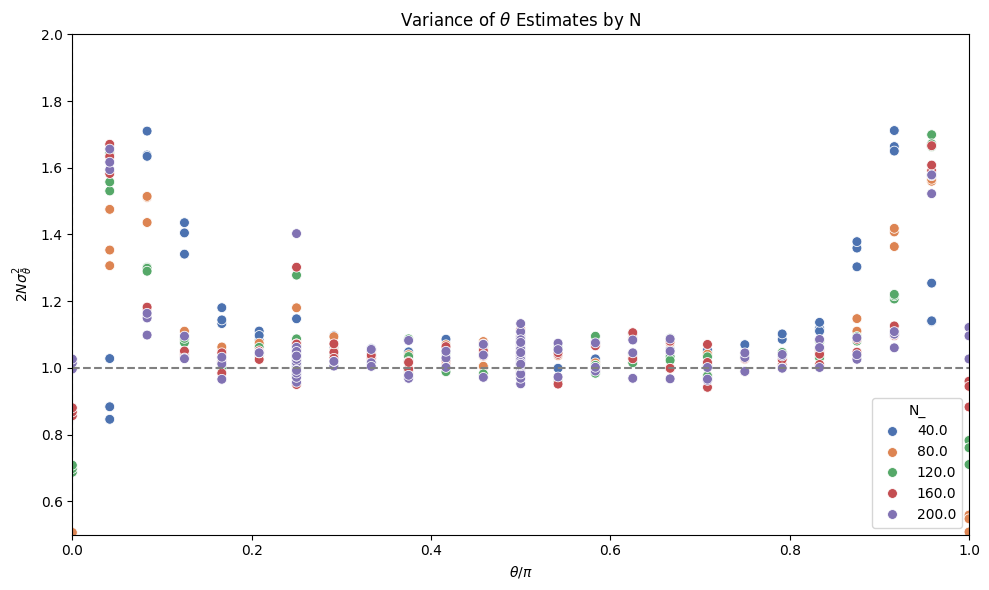

In [15]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Integrated over phi

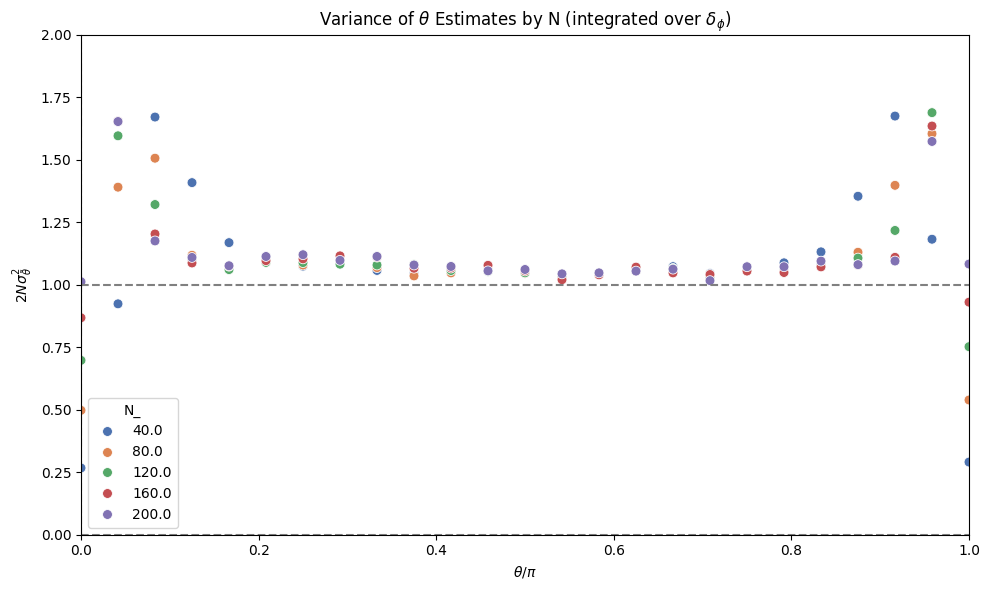

In [16]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates_integrated_over_phi[theta_estimates_integrated_over_phi["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates_integrated_over_phi["theta_"] / np.pi,
    y=theta_estimates_integrated_over_phi["theta_estimate_var"] * 2 * theta_estimates_integrated_over_phi["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N (integrated over $\delta_\phi$)")

plt.xlim(0, 1)
plt.ylim(0, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N_integrated_over_phi.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

### With Theory

#### By phi

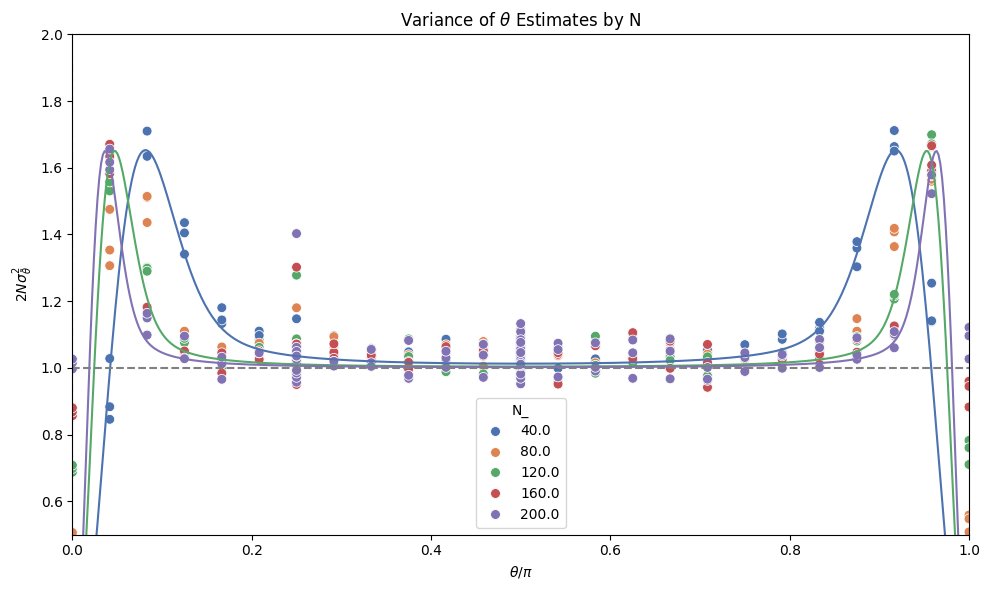

In [17]:
# plot theta_estimates with the theory curve
plt.figure(figsize=(10, 6))

N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette=color_dict,
    s=50,
)

# Add theory curve line
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 120, 200])]
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette=color_dict,
    legend=False,
)

plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Integrated over phi

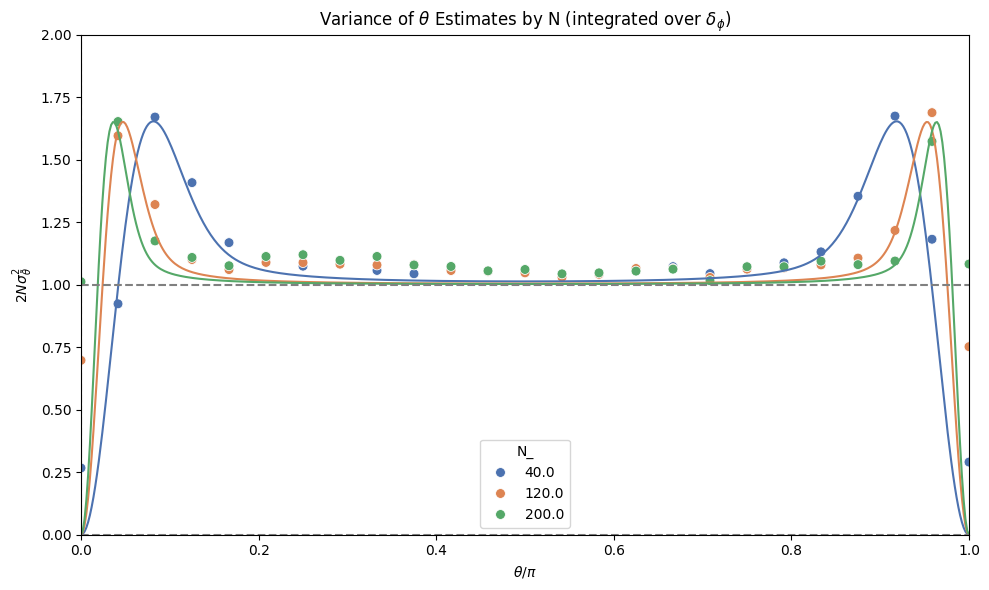

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set up
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter integrated data
filtered_data = theta_estimates_integrated_over_phi[
    theta_estimates_integrated_over_phi["N_"].isin(N_values)
]

# Filter theory data
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 120, 200])]

# Start plotting
plt.figure(figsize=(10, 6))

# Scatter plot for integrated-over-phi empirical data
sns.scatterplot(
    data=filtered_data,
    x=filtered_data["theta_"] / np.pi,
    y=filtered_data["theta_estimate_var"] * 2 * filtered_data["N_"],
    hue="N_",
    palette=color_dict,
    s=50,
)

# Line plot for theory curves
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette=color_dict,
    legend=False,  # Keeps legend from duplicating
)

# Axes and labels
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

# Reference lines
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N (integrated over $\delta_\phi$)")

# Axis limits
plt.xlim(0, 1)
plt.ylim(0, 2)

# Save and show
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N_integrated_over_phi.png"
)
plt.savefig(file_name, dpi=300)
plt.show()


# Delta Phi

In [19]:
# only when theta = pi/2 or pi/4
delta_phi_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "delta_phi_estimate": ["mean", "std", "var",],
    "delta_phi": "count",
    "theta_estimate": ["mean", "std", "var"]
}).reset_index()
delta_phi_estimates.columns = ['_'.join(col).strip() for col in delta_phi_estimates.columns.values]
delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,0.000000,0.000000,0.785398,0.000000,0.000000,9157,0.015239,0.057357,0.003290
1,40.0,0.000000,0.785398,0.806975,0.061028,0.003724,9053,0.015503,0.057735,0.003333
2,40.0,0.000000,1.570796,0.785398,0.000000,0.000000,7550,0.015794,0.058283,0.003397
3,40.0,0.130900,0.000000,0.751399,0.081356,0.006619,9213,0.073176,0.113362,0.012851
4,40.0,0.130900,0.785398,0.774079,0.072720,0.005288,9164,0.057196,0.102834,0.010575
...,...,...,...,...,...,...,...,...,...,...
715,367400.0,1.178097,0.000000,0.104277,NaN,NaN,1,1.159532,NaN,NaN
716,368520.0,0.130900,0.000000,0.241254,NaN,NaN,1,0.134636,NaN,NaN
717,369040.0,1.047198,0.000000,0.109381,NaN,NaN,1,1.030416,NaN,NaN
718,369320.0,0.261799,0.000000,0.162726,NaN,NaN,1,0.256439,NaN,NaN


#### Theta = pi/2

In [20]:
# get the subset where theta = pi/2 using numpy to find theta close to pi/2

delta_phi_estimates_theta_pi_over_2 = delta_phi_estimates[
    np.isclose(delta_phi_estimates["theta_"], np.pi / 2, atol=0.001)
].reset_index(drop=True)
delta_phi_estimates_theta_pi_over_2

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,1.570796,0.000000,0.229041,0.047651,0.002271,18052,1.548028,0.113150,0.012803
1,40.0,1.570796,0.065450,0.228145,0.048210,0.002324,8978,1.546946,0.112702,0.012702
2,40.0,1.570796,0.130900,0.240461,0.056672,0.003212,8883,1.549500,0.113459,0.012873
3,40.0,1.570796,0.196350,0.257751,0.068059,0.004632,8874,1.550628,0.113639,0.012914
4,40.0,1.570796,0.261799,0.286897,0.082300,0.006773,8968,1.546520,0.112518,0.012660
...,...,...,...,...,...,...,...,...,...,...
148,355320.0,1.570796,0.130900,0.143895,NaN,NaN,1,1.549634,NaN,NaN
149,358720.0,1.570796,0.261799,0.251117,NaN,NaN,1,1.546667,NaN,NaN
150,359120.0,1.570796,0.065450,0.110265,NaN,NaN,1,1.547106,NaN,NaN
151,361000.0,1.570796,0.000000,0.103041,NaN,NaN,1,1.548534,NaN,NaN


##### Mean

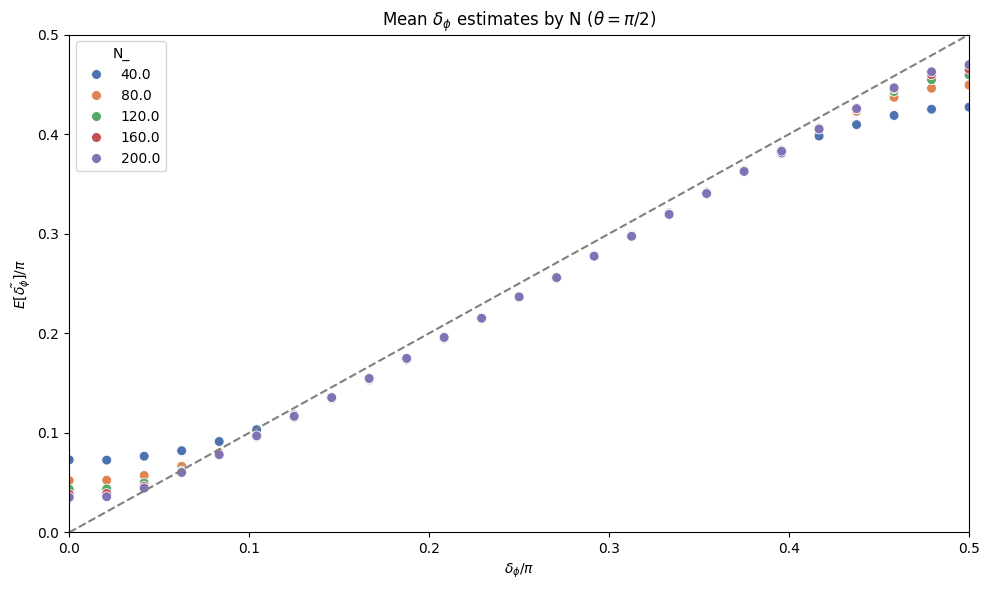

In [21]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[
        delta_phi_estimates_theta_pi_over_2["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")

plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()
plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

##### Error

##### Variance

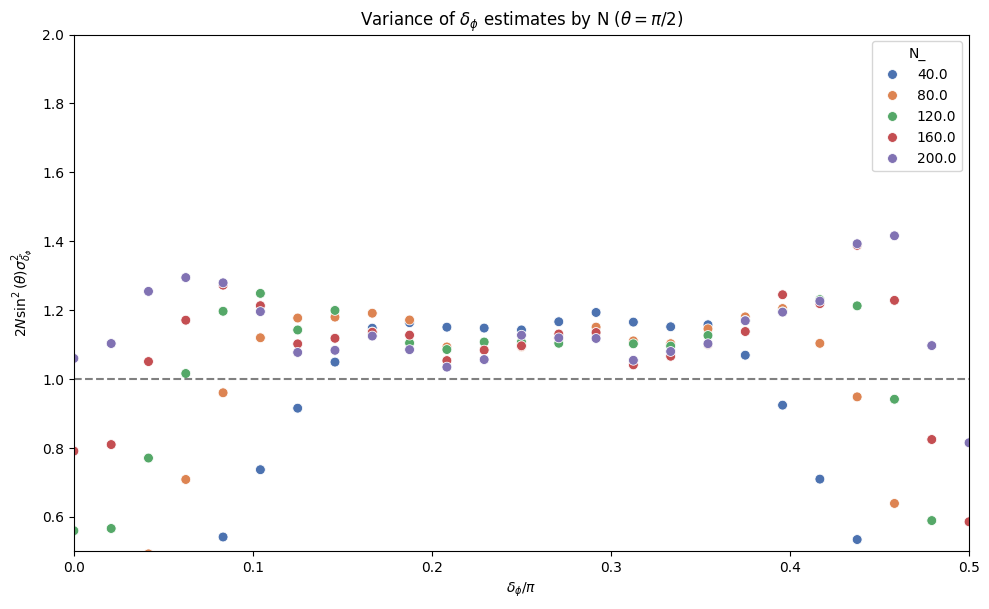

In [22]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[delta_phi_estimates_theta_pi_over_2["N_"].isin([40, 80, 120, 160, 200])],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_2["N_"] * np.sin(delta_phi_estimates_theta_pi_over_2["theta_"]) **2,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1241977/4045133925.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


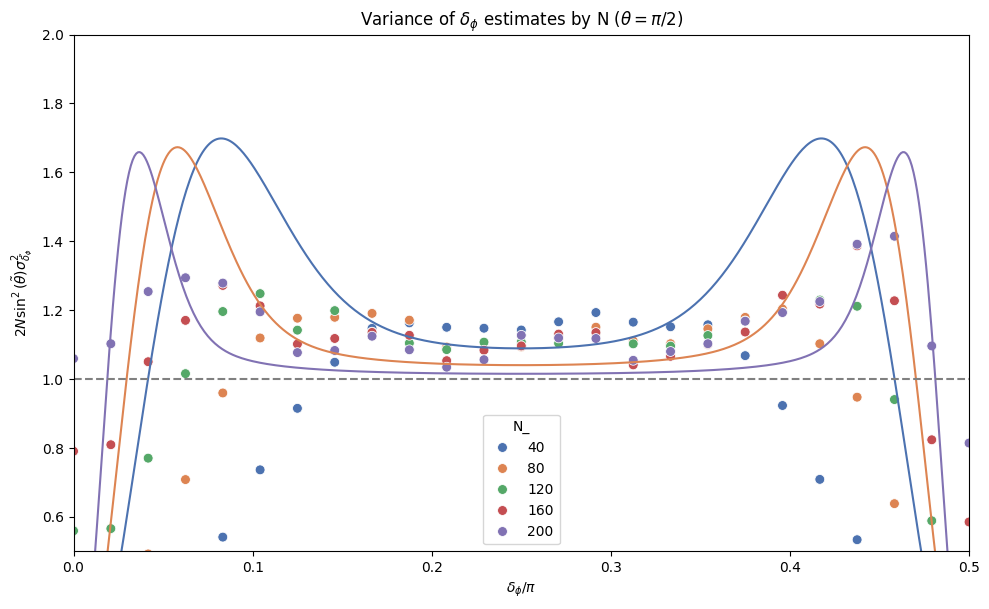

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_2[
    delta_phi_estimates_theta_pi_over_2["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Can be different subset
][delta_phi_theory["theta"] == np.pi / 2]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1241977/2678357665.py:16: RuntimeWarning: divide by zero encountered in divide
  cramer_rao = 1 / fisher_information


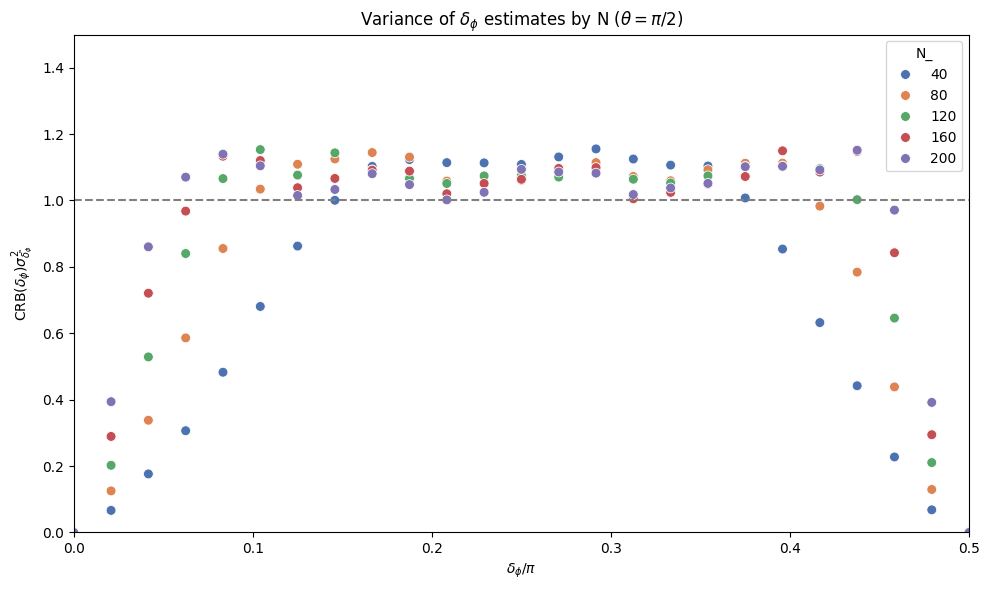

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Cramér-Rao bound data
eta = 0.985
delta_phi_range = np.linspace(0, np.pi / 2, 100)
fisher_information = (
    eta**2 * np.sin(2*delta_phi_range) ** 2 / (1 - eta**2 * np.cos(2*delta_phi_range) ** 2)
)
cramer_rao = 1 / fisher_information

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_"]) ** 2
    * eta**2 * np.sin(2*data_filtered["delta_phi_"]) ** 2 / (1 - eta**2 * np.cos(2*data_filtered["delta_phi_"]) ** 2), # CRB
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot the cramér-rao bound
# sns.lineplot(
#     x=delta_phi_range / np.pi,
#     y=cramer_rao,
#     color="black",
#     label="Cramér-Rao Bound",
#     linestyle="--",
# )

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")



plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Theta = pi/4

In [26]:
delta_phi_estimates_theta_pi_over_4 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 4]
delta_phi_estimates_theta_pi_over_4

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
18,40.0,0.785398,0.000000,0.328640,0.067391,0.004542,18048,0.766059,0.113290,0.012835
19,40.0,0.785398,0.065450,0.326949,0.066311,0.004397,9025,0.766029,0.113498,0.012882
20,40.0,0.785398,0.130900,0.333098,0.068662,0.004714,9052,0.765085,0.115096,0.013247
21,40.0,0.785398,0.196350,0.342002,0.077659,0.006031,8993,0.765663,0.114328,0.013071
22,40.0,0.785398,0.261799,0.382588,0.097146,0.009437,7965,0.711213,0.119754,0.014341
...,...,...,...,...,...,...,...,...,...,...
692,359720.0,0.785398,0.196350,0.179015,NaN,NaN,1,0.772440,NaN,NaN
693,359840.0,0.785398,0.785398,0.728906,NaN,NaN,1,0.777417,NaN,NaN
695,361000.0,0.785398,0.065450,0.112707,NaN,NaN,1,0.772709,NaN,NaN
699,362080.0,0.785398,0.130900,0.134555,NaN,NaN,1,0.771974,NaN,NaN


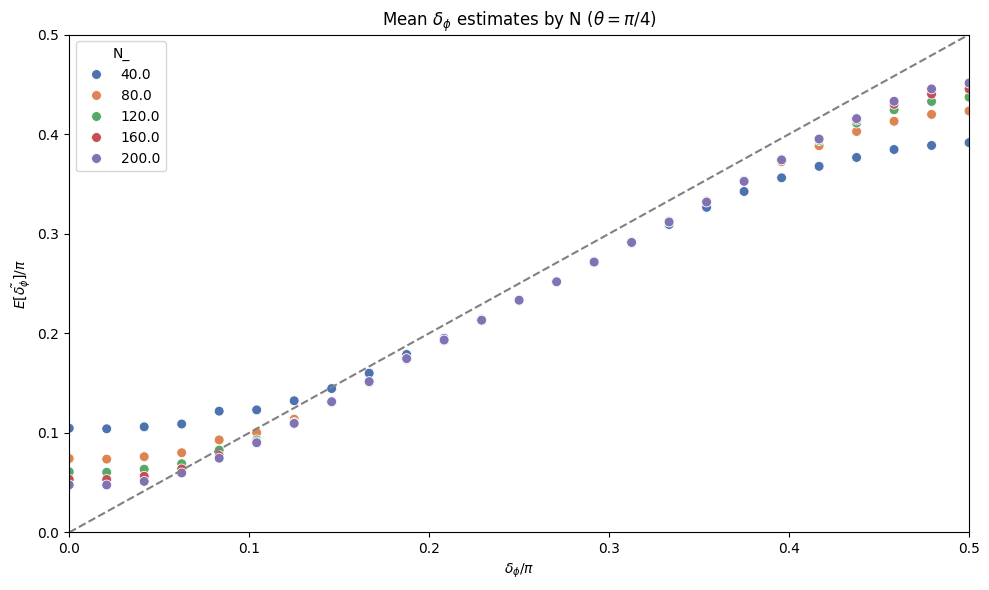

In [27]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)


plt.xlabel(r"$\delta_{\phi} / \pi$")

plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

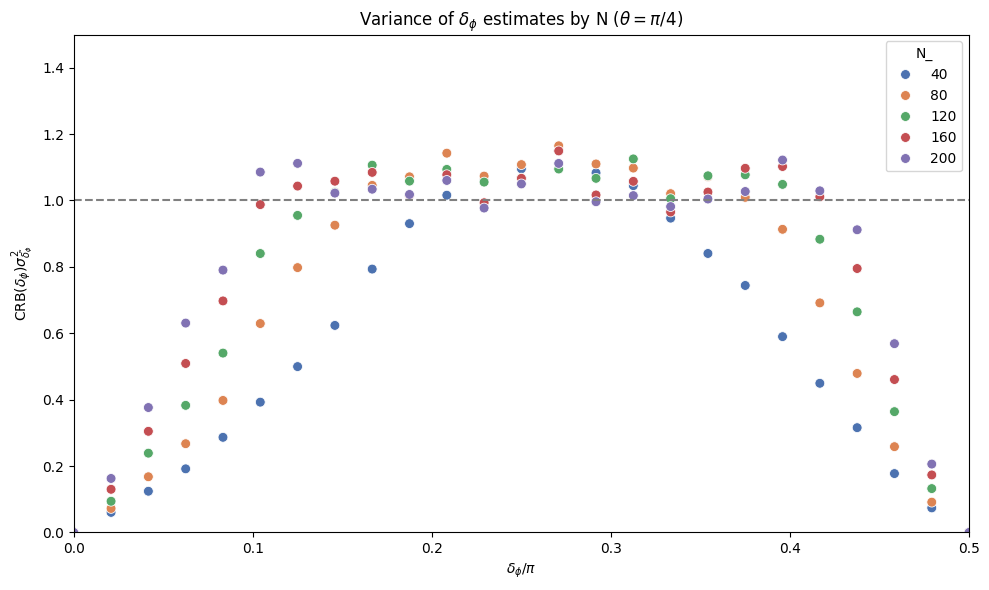

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Plot delta_phi_estimates for theta = pi/4 with CRB scaling
plt.figure(figsize=(10, 6))
data_pi_4 = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]

sns.scatterplot(
    data=data_pi_4,
    x=data_pi_4["delta_phi_"] / np.pi,
    y=data_pi_4["delta_phi_estimate_var"]
    * 2
    * data_pi_4["N_"]
    * np.sin(data_pi_4["theta_estimate_mean"]) ** 2
    * eta**2 * np.sin(2 * data_pi_4["delta_phi_"]) ** 2
    / (1 - eta**2 * np.cos(2 * data_pi_4["delta_phi_"]) ** 2),
    hue=data_pi_4["N_"].astype(int),
    palette=color_dict,
    s=50,
)

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

plt.tight_layout()

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()


/tmp/ipykernel_1241977/2932750281.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


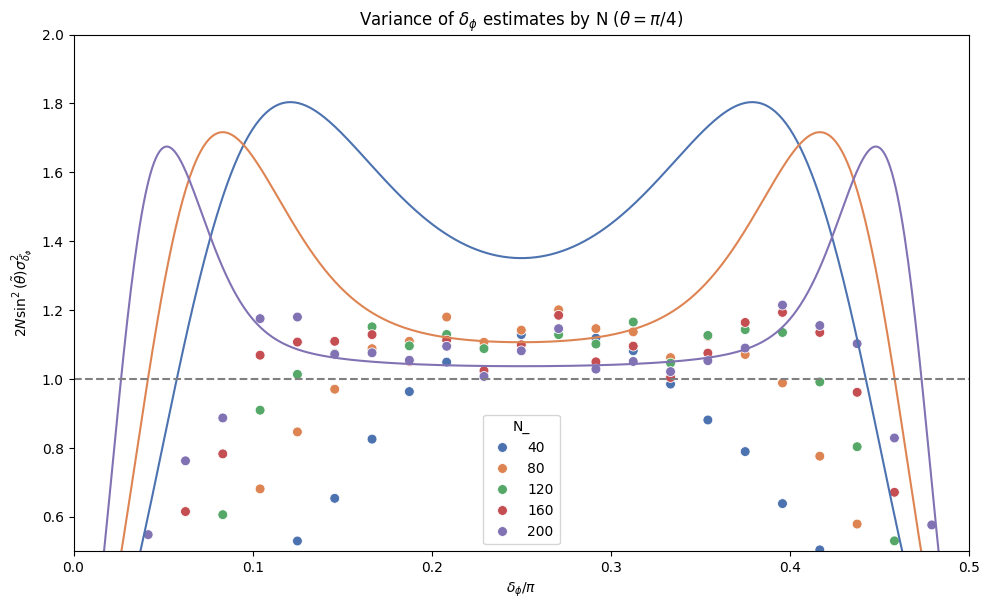

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Adjust if needed
][delta_phi_theory["theta"] == np.pi * 0.25]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"])
    ** 2,  # * 2 * theory_filtered["n"] * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()